In [1]:
# Monte-Carlo playoff odds
# Generate my own playoff odds

# For now, I'm focusing on the mechanics of the simulation, and less so on the inputs (e.g., the projected team quality)
# So I'm using 538's win probabilities for each game, rather than computing my own

# I'm also using 538's results/schedule data, because it is so easy to use

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from season_simulator import *

%matplotlib inline

In [2]:
(played, remain) = get_games()
played.shape, remain.shape

((2050, 26), (380, 26))

In [3]:
remain.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'rating1_pre', 'rating2_pre', 'pitcher1', 'pitcher2', 'pitcher1_rgs',
       'pitcher2_rgs', 'pitcher1_adj', 'pitcher2_adj', 'rating_prob1',
       'rating_prob2', 'rating1_post', 'rating2_post', 'score1', 'score2'],
      dtype='object')

In [4]:
pd.concat([remain['rating1_pre'], remain['rating2_pre']]).nunique()
# So if there are 30 distinct values here, these are the unadjusted team ratings (quality)


30

In [5]:
remain.query('team2=="BAL" and team1=="TOR"').T

,244,263,279
date,2022-09-18,2022-09-17,2022-09-16
season,2022,2022,2022
neutral,0,0,0
playoff,NaN,NaN,NaN
team1,TOR,TOR,TOR
team2,BAL,BAL,BAL
elo1_pre,1539.69678,1539.69678,1539.69678
elo2_pre,1505.279533,1505.279533,1505.279533
elo_prob1,0.583286,0.583286,0.583286
elo_prob2,0.416714,0.416714,0.416714


In [6]:

rating_diffs = remain['rating1_pre'] + remain['pitcher1_adj'] - remain['rating2_pre'] - remain['pitcher2_adj']
px.scatter((pd.concat([rating_diffs.rename('diff'), remain['rating_prob1']], axis=1)), x='diff', y='rating_prob1')

In [7]:
def p_from_diff(diff):
    return 1/(10**(-diff/400)+1)

In [8]:
p_from_diff(rating_diffs)
px.scatter((pd.concat([p_from_diff(rating_diffs+25).rename('p'), remain['rating_prob1']], axis=1)), x='p', y='rating_prob1')

# Exercise some functions that will be used in the simulation

In [9]:
compute_standings(played)

,W,L
LAD,94,42
HOU,88,49
NYM,87,51
ATL,86,51
NYY,83,54
STL,81,57
SEA,77,60
TBD,77,58
SDP,76,62
TOR,76,60


In [10]:


rand0 = get_randoms(0)
sim_rem_games(remain, rand0)

,W,L
ATL,19,6
STL,17,7
CHW,17,8
CLE,17,10
LAD,16,10
HOU,16,9
CIN,15,12
CHC,15,10
NYM,15,9
BOS,15,9


In [11]:
cur_standings = compute_standings(played)
rem_standings = sim_rem_games(remain, rand0)
full_standings = cur_standings+rem_standings
full_standings

,W,L
ANA,70,92
ARI,74,88
ATL,105,57
BAL,83,79
BOS,82,80
CHC,72,90
CHW,86,76
CIN,70,92
CLE,87,75
COL,67,95


In [43]:
finish_one_season(cur_standings, remain, rand0)

In [13]:
sim_results = sim_n_seasons(cur_standings, remain, 100)
sim_results

,,W,L,wpct,div,lg,rand,div_win,lg_rank
team,iter,,,,,,,,
HOU,0,106,56,0.654321,ALW,A,0.422782,False,1
NYY,0,101,61,0.623457,ALE,A,0.528610,False,2
TBD,0,98,64,0.604938,ALE,A,0.999362,False,3
SEA,0,87,75,0.537037,ALW,A,0.686387,False,4
TOR,0,84,78,0.518519,ALE,A,0.525402,False,5
...,...,...,...,...,...,...,...,...,...
CHC,99,68,94,0.419753,NLC,N,0.069223,False,11
COL,99,68,94,0.419753,NLW,N,0.052521,False,12
FLA,99,66,96,0.407407,NLE,N,0.977356,False,13


In [14]:
import playoff_simulator as ps
result = finish_one_season(cur_standings, remain, rand0)

ratings = remain[['team1', 'rating1_pre']].drop_duplicates().set_index('team1')['rating1_pre'].rename('rating')
ratings

team1
LAD    1619.482522
SEA    1528.952636
SDP    1521.162908
NYM    1555.552626
MIL    1522.153719
HOU    1570.833715
FLA    1465.345006
CLE    1506.397336
CIN    1473.348815
CHW    1513.627029
BOS    1506.835977
TEX    1471.190115
PIT    1422.093255
BAL    1489.941756
OAK    1435.582846
ATL    1579.758422
ANA    1493.786473
SFG    1500.927075
CHC    1464.771660
STL    1532.722193
TOR    1543.983708
WSN    1445.346439
NYY    1568.085764
DET    1444.809619
MIN    1507.190580
ARI    1483.617065
COL    1454.581005
KCR    1455.212753
TBD    1541.935130
PHI    1530.771856
Name: rating, dtype: float64

In [15]:
seeds = {league: dict(result.query('lg_rank <= 6 and lg==@league')[['lg_rank']].reset_index().set_index('lg_rank')['index'].rename('team')) for league in ('A', 'N')}
seeds

{'A': {1: 'HOU', 2: 'NYY', 3: 'TBD', 4: 'SEA', 5: 'TOR', 6: 'CLE'},
 'N': {1: 'LAD', 2: 'ATL', 3: 'NYM', 4: 'STL', 5: 'SDP', 6: 'PHI'}}

In [16]:
ps.run_playoffs(ratings, seeds['A'], seeds['N'])

PHI    0.053410
SDP    0.053926
CLE    0.053410
TOR    0.053926
STL    0.066349
NYM    0.067129
SEA    0.066349
TBD    0.067129
ATL    0.128171
LAD    0.131015
NYY    0.128171
HOU    0.131015
dtype: float64

In [17]:
# Count the number of div/wc/playoff appearances by team from a set of results
summarize_sim_results(sim_results)

,mean,max,min,1,2,3,4,5,6,div_wins,playoffs,champ_shares,home_game
team,,,,,,,,,,,,,
ANA,72.60,79,67,0,0,0,0,0,0,0,0,0.000,0.00
ARI,75.61,81,72,0,0,0,0,0,0,0,0,0.000,0.00
ATL,101.23,108,95,0,42,57,1,0,0,99,100,9.515,100.00
BAL,83.42,90,78,0,0,0,0,8,16,0,24,1.200,10.56
BOS,78.38,84,73,0,0,0,0,0,0,0,0,0.000,0.00
CHC,68.92,75,63,0,0,0,0,0,0,0,0,0.000,0.00
CHW,82.70,88,77,0,0,0,0,4,17,0,21,1.050,9.24
CIN,67.87,74,63,0,0,0,0,0,0,0,0,0.000,0.00
CLE,84.36,91,78,0,0,1,3,5,30,1,39,2.015,19.40


In [18]:
weights

{'champ_shares': {1: 0.135, 2: 0.13, 3: 0.07, 4: 0.065, 5: 0.05, 6: 0.05},
 'home_game': {1: 1, 2: 1, 3: 1, 4: 1, 5: 0.44, 6: 0.44}}

In [19]:
sim_results.groupby('iter')['W'].max().median()

111.0

In [20]:
summary = summarize_sim_results(sim_results)
print(summary.sort_values('champ_shares', ascending=False).to_string())

        mean  max  min    1   2   3   4   5   6  div_wins  playoffs  champ_shares  home_game
team                                                                                        
LAD   111.20  116  105  100   0   0   0   0   0       100       100        13.500     100.00
HOU   103.11  108   98   91   9   0   0   0   0       100       100        13.455     100.00
NYY    98.32  103   91    9  85   3   2   1   0        97       100        12.655      99.44
NYM   101.76  108   96    0  58  41   1   0   0        99       100        10.475     100.00
ATL   101.23  108   95    0  42  57   1   0   0        99       100         9.515     100.00
SEA    91.44   98   84    0   4  37  42  14   2        41        99         6.640      90.04
STL    94.44   99   89    0   0   2  92   4   2         2       100         6.420      96.64
TBD    90.73   98   86    0   2  34  31  23  10        36       100         6.305      81.52
TOR    89.83   95   83    0   0  25  21  42  10        25        98   

In [23]:
tms = ('SDP', 'PHI')
sim_results.query('lg_rank==4 and team in @tms')['W'].groupby('team').mean()

team
PHI    92.333333
SDP    93.000000
Name: W, dtype: float64

In [24]:

phils4 = sim_results.query('lg_rank==4 and team=="PHI"').reset_index()['iter'].values
sim_results.query('iter in @phils4 and div=="NLE" and div_win').reset_index()['team'].value_counts()


Series([], Name: team, dtype: int64)

In [25]:
tms = ('SDP', 'PHI')
sim_results.query('W>=94 and team in @tms').reset_index()['team'].value_counts()

PHI    2
SDP    1
Name: team, dtype: int64

In [26]:
os_playoffs = sim_results.query('team=="BAL" and lg_rank<=6').reset_index()['iter'].values
sim_results.query('iter in @os_playoffs and lg=="A" and lg_rank==7').reset_index()['team'].value_counts()

CLE    11
CHW     7
MIN     3
TOR     2
SEA     1
Name: team, dtype: int64

In [27]:
tms= ['SEA', 'NYY']
sim_results.query("team in @tms")['lg_rank'].unstack().T.product(axis=1).value_counts()

8     38
6     36
10    14
4      4
3      4
12     2
14     1
20     1
dtype: int64

In [28]:
# How many games does each team win in each seeding?
sim_results.query('lg_rank <= 6').groupby(['team', 'lg_rank'])['W'].mean().unstack()

lg_rank,1,2,3,4,5,6
team,,,,,,
ATL,NaN,102.809524,100.140351,97.000000,NaN,NaN
BAL,NaN,NaN,NaN,NaN,88.500000,85.437500
CHW,NaN,NaN,NaN,NaN,86.750000,85.529412
CLE,NaN,NaN,91.000000,89.666667,87.800000,85.633333
HOU,103.472527,99.444444,NaN,NaN,NaN,NaN
LAD,111.200000,NaN,NaN,NaN,NaN,NaN
MIL,NaN,NaN,NaN,93.000000,89.250000,86.857143
MIN,NaN,NaN,NaN,90.000000,86.333333,85.066667
NYM,NaN,102.672414,100.609756,96.000000,NaN,NaN


In [29]:
remain.tail(10)


,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
370,2022-09-09,2022,0,NaN,PHI,WSN,1523.074132,1444.728610,0.643170,0.356830,...,51.061300,43.177017,-18.292219,-12.364139,0.648491,0.351509,NaN,NaN,NaN,NaN
371,2022-09-09,2022,0,NaN,NYY,TBD,1559.133656,1555.752602,0.539323,0.460677,...,54.302406,56.368299,-7.781648,9.993401,0.547640,0.452360,NaN,NaN,NaN,NaN
372,2022-09-09,2022,0,NaN,BAL,BOS,1505.279533,1495.336746,0.548693,0.451307,...,51.436992,48.295242,1.490831,-14.981483,0.538110,0.461890,NaN,NaN,NaN,NaN
373,2022-09-09,2022,0,NaN,FLA,NYM,1452.415266,1550.543789,0.394910,0.605090,...,53.212191,NaN,-1.936649,NaN,0.385638,0.614362,NaN,NaN,NaN,NaN
374,2022-09-09,2022,0,NaN,PIT,STL,1419.315546,1549.652662,0.351574,0.648426,...,50.947013,54.490277,14.486830,10.025138,0.390536,0.609464,NaN,NaN,NaN,NaN
375,2022-09-09,2022,0,NaN,CHC,SFG,1460.155091,1508.522947,0.464989,0.535011,...,50.093601,58.989246,-1.247295,27.042976,0.443921,0.556079,NaN,NaN,NaN,NaN
376,2022-09-08,2022,0,NaN,OAK,CHW,1452.431323,1505.892907,0.457703,0.542297,...,51.480708,60.745417,9.710080,35.996357,0.390137,0.609863,NaN,NaN,NaN,NaN
377,2022-09-08,2022,0,NaN,MIL,SFG,1511.893274,1508.522947,0.539308,0.460692,...,57.334987,45.106992,15.859897,-38.203619,0.639123,0.360877,NaN,NaN,NaN,NaN
378,2022-09-08,2022,0,NaN,NYY,MIN,1559.133656,1499.832656,0.617634,0.382366,...,58.163528,56.028150,10.365629,21.298132,0.604862,0.395138,NaN,NaN,NaN,NaN
379,2022-09-08,2022,0,NaN,PHI,FLA,1523.074132,1452.415266,0.632952,0.367048,...,50.862485,60.601994,-19.226650,32.795427,0.553623,0.446377,NaN,NaN,NaN,NaN


In [30]:
sim_both_ways(cur_standings, remain.index.values[-1], 100, remain)

team
ANA    0.000
ARI    0.000
ATL    0.890
BAL    0.050
BOS    0.050
CHC    0.000
CHW    0.000
CIN    0.000
CLE    0.380
COL    0.000
DET    0.000
FLA    0.000
HOU    0.065
KCR    0.000
LAD   -0.005
MIL   -0.750
MIN   -0.550
NYM   -0.830
NYY    0.385
OAK    0.000
PHI    0.375
PIT    0.000
SDP    0.480
SEA   -0.210
SFG    0.000
STL   -0.160
TBD    0.105
TEX    0.000
TOR   -0.275
WSN    0.000
Name: 379, dtype: float64

In [31]:
next_dt = remain['date'].min()
game_ids = remain.query('date == @next_dt').index.values
game_ids

array([376, 377, 378, 379])

In [32]:
results = pd.DataFrame()
for i in range(2, 3):
    num_iterations = 10 ** i
    print(f'Starting {num_iterations} iterations')
    results = pd.concat([sim_both_ways(cur_standings, game_id, num_iterations, remain) for game_id in game_ids], axis=1)
    print(results)

Starting 100 iterations
        376    377    378    379
team                            
ANA   0.000  0.000  0.000  0.000
ARI   0.000  0.000  0.000  0.000
ATL   0.370 -0.175  0.365  0.665
BAL  -0.005  0.250  0.070  0.135
BOS   0.000  0.000 -0.050  0.050
CHC   0.000  0.000  0.000  0.000
CHW   0.000 -0.135  0.050 -0.350
CIN   0.000  0.000  0.000  0.000
CLE  -0.370  0.105  0.070  0.035
COL   0.000  0.000  0.000  0.000
DET   0.000  0.000  0.000  0.000
FLA   0.000  0.000  0.000  0.000
HOU  -0.030  0.015 -0.020 -0.025
KCR   0.000  0.000  0.000  0.000
LAD   0.005  0.000 -0.005 -0.005
MIL   0.050  0.450  0.530 -0.050
MIN   0.365 -0.235 -0.015  0.000
NYM  -0.385  0.185 -0.365 -0.660
NYY   0.145 -0.275 -0.040 -0.050
OAK   0.000  0.000  0.000  0.000
PHI  -0.115 -0.470 -0.285  0.450
PIT   0.000  0.000  0.000  0.000
SDP   0.020  0.165 -0.245 -0.395
SEA   0.010  0.030 -0.070  0.150
SFG   0.000 -0.050  0.000  0.000
STL   0.055 -0.105  0.005 -0.005
TBD  -0.105  0.085  0.230  0.050
TEX   0.000  0.000 

In [33]:
game_descs = remain.apply(lambda x: f'{x.team2}\n@{x.team1}', axis=1)
game_descs.to_dict()

{0: 'COL\n@LAD',
 1: 'DET\n@SEA',
 2: 'SFG\n@SDP',
 3: 'WSN\n@NYM',
 4: 'ARI\n@MIL',
 5: 'PHI\n@HOU',
 6: 'ATL\n@FLA',
 7: 'KCR\n@CLE',
 8: 'CHC\n@CIN',
 9: 'MIN\n@CHW',
 10: 'TBD\n@BOS',
 11: 'NYY\n@TEX',
 12: 'STL\n@PIT',
 13: 'TOR\n@BAL',
 14: 'ANA\n@OAK',
 15: 'COL\n@LAD',
 16: 'DET\n@SEA',
 17: 'SFG\n@SDP',
 18: 'ANA\n@OAK',
 19: 'PHI\n@HOU',
 20: 'MIN\n@CHW',
 21: 'NYY\n@TEX',
 22: 'ARI\n@MIL',
 23: 'WSN\n@NYM',
 24: 'TBD\n@BOS',
 25: 'TOR\n@BAL',
 26: 'ATL\n@FLA',
 27: 'CHC\n@CIN',
 28: 'STL\n@PIT',
 29: 'DET\n@SEA',
 30: 'KCR\n@CLE',
 31: 'NYY\n@TEX',
 32: 'COL\n@LAD',
 33: 'DET\n@SEA',
 34: 'SFG\n@SDP',
 35: 'ANA\n@OAK',
 36: 'PHI\n@HOU',
 37: 'MIN\n@CHW',
 38: 'ARI\n@MIL',
 39: 'WSN\n@NYM',
 40: 'TBD\n@BOS',
 41: 'NYY\n@TEX',
 42: 'TOR\n@BAL',
 43: 'ATL\n@FLA',
 44: 'CHC\n@CIN',
 45: 'STL\n@PIT',
 46: 'KCR\n@CLE',
 47: 'NYM\n@ATL',
 48: 'OAK\n@SEA',
 49: 'CHW\n@SDP',
 50: 'COL\n@LAD',
 51: 'TEX\n@ANA',
 52: 'ARI\n@SFG',
 53: 'CIN\n@CHC',
 54: 'PIT\n@STL',
 55: 'FLA\n@MIL',
 5

In [34]:
for_graphing = results/(num_iterations/100)
for_graphing = for_graphing.rename(columns=game_descs.to_dict())
for_graphing


,CHW\n@OAK,SFG\n@MIL,MIN\n@NYY,FLA\n@PHI
team,,,,
ANA,0.000,0.000,0.000,0.000
ARI,0.000,0.000,0.000,0.000
ATL,0.370,-0.175,0.365,0.665
BAL,-0.005,0.250,0.070,0.135
BOS,0.000,0.000,-0.050,0.050
CHC,0.000,0.000,0.000,0.000
CHW,0.000,-0.135,0.050,-0.350
CIN,0.000,0.000,0.000,0.000
CLE,-0.370,0.105,0.070,0.035


In [35]:
teamwise_leverage = for_graphing.abs().sum(axis=1).sort_values(ascending=False)
teamwise_leverage


team
NYM    1.595
ATL    1.575
PHI    1.320
MIL    1.080
SDP    0.825
MIN    0.615
CLE    0.580
CHW    0.535
NYY    0.510
TBD    0.470
BAL    0.460
TOR    0.400
SEA    0.260
STL    0.170
BOS    0.100
HOU    0.090
SFG    0.050
LAD    0.015
TEX    0.000
PIT    0.000
ANA    0.000
OAK    0.000
ARI    0.000
KCR    0.000
FLA    0.000
DET    0.000
COL    0.000
CIN    0.000
CHC    0.000
WSN    0.000
dtype: float64

<AxesSubplot:ylabel='team'>

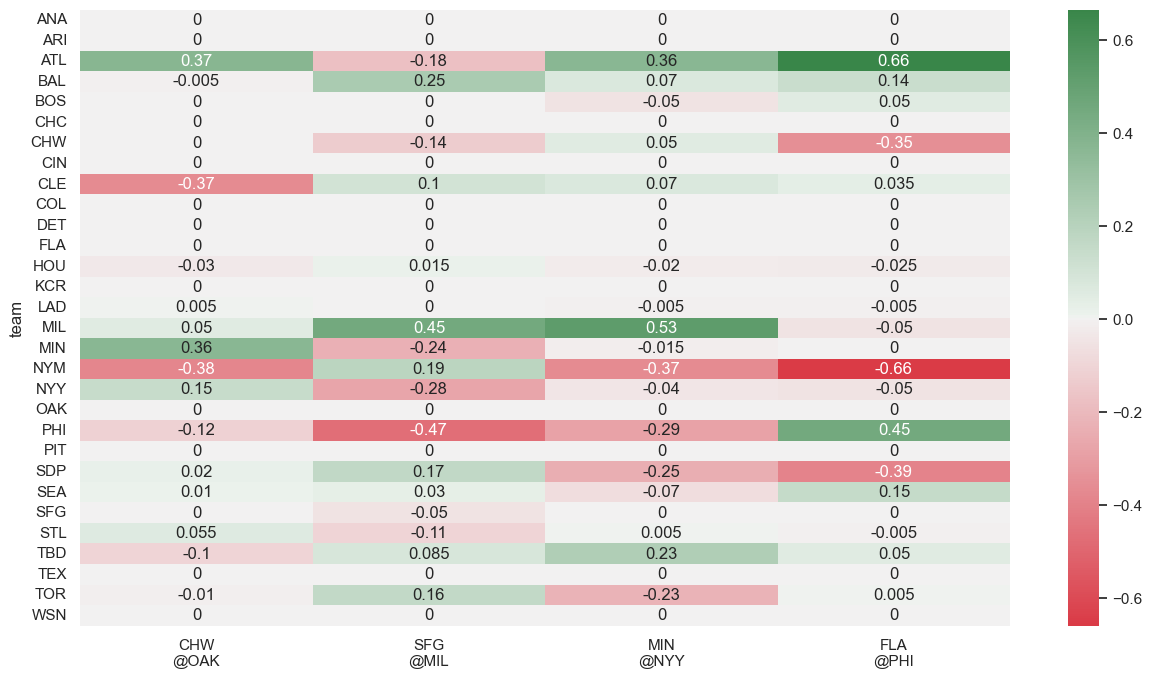

In [36]:
sns.set(rc = {'figure.figsize':(15,8)})
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(for_graphing, cmap=cmap, annot=True, center=0)

In [37]:
(abs(results)).sum(axis=0).sort_values()

376    2.04
378    2.64
377    2.89
379    3.08
dtype: float64

In [38]:
results.sum(axis=1).sum()

1.7208456881689926e-15

In [39]:
gamewise_leverage = for_graphing.abs().sum(axis=0).sort_values(ascending=False)
gamewise_leverage

FLA\n@PHI    3.08
SFG\n@MIL    2.89
MIN\n@NYY    2.64
CHW\n@OAK    2.04
dtype: float64